In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('clean-std-norm-nasa.csv')

In [3]:
data = data.drop(columns=['time.1'],axis=0)
data

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,class,outlier
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,7,1
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,7,1
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,7,1
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,7,1
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,1,0
...,...,...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965,5,1
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395,5,1
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395,5,1
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611,5,1


In [4]:
data = data.drop(columns=['class'],axis=0)
data

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,outlier
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,1
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,1
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,1
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,1
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,0
...,...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965,1
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395,1
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395,1
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611,1


In [5]:
Xtrain = data.iloc[:34370, :-1]
Xtrain

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347
...,...,...,...,...,...,...,...,...
34365,0,0.593750,0.507015,0.368590,0.637950,0.660131,0.654896,0.575563
34366,0,0.437500,0.507015,0.362179,0.637926,0.555556,0.629213,0.575563
34367,0,0.453125,0.507272,0.375000,0.638308,0.535948,0.619583,0.572347
34368,0,0.437500,0.507144,0.358974,0.638522,0.575163,0.632424,0.572347


In [6]:
Ytrain = data.iloc[:34370,-1:]
Ytrain

,outlier
0,1
1,1
2,1
3,1
4,0
...,...
34365,0
34366,0
34367,0
34368,0


In [7]:
Xtest , Ytest = data.iloc[34370:44189,:-1],data.iloc[34370:44189,-1:]
Xval,Yval = data.iloc[44190:,:-1],data.iloc[44190:,-1:]

In [8]:
Xtrain =Xtrain.values.reshape(Xtrain.shape[0],Xtrain.shape[1],1)
Xval = Xval.values.reshape(Xval.shape[0],Xval.shape[1],1)
Xtest = Xtest.values.reshape(Xtest.shape[0],Xtest.shape[1],1)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *

In [15]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=([Xtrain.shape[1], Xtrain.shape[2]])))
model.add(TimeDistributed(Dense(128, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(units = 100))
model.add(Dense(units = 100))
model.add(Dense(units = 1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 8, 256)            133120    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 8, 1)              257       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 1)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 8, 100)            200       
_________________________________________________________________
dense_6 (Dense)              (None, 8, 100)            10100     
_________________________________________________________________
dense_7 (Dense)              (None, 8, 1)              101       
Total params: 143,778
Trainable params: 143,778
Non-trainable params: 0
________________________________________________

In [17]:
history = model.fit(Xtrain, Ytrain, epochs=20,
                    validation_data=(Xval, Yval))

Epoch 1/20
1075/1075 [==============================] - 8s 8ms/step - loss: 0.0606 - accuracy: 0.9344 - val_loss: 0.0978 - val_accuracy: 0.8904
Epoch 2/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0602 - accuracy: 0.9350 - val_loss: 0.0999 - val_accuracy: 0.8904
Epoch 3/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0470 - accuracy: 0.9498 - val_loss: 0.0572 - val_accuracy: 0.9401
Epoch 4/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0342 - accuracy: 0.9645 - val_loss: 0.0473 - val_accuracy: 0.9526
Epoch 5/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0327 - accuracy: 0.9661 - val_loss: 0.0482 - val_accuracy: 0.9524
Epoch 6/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0324 - accuracy: 0.9664 - val_loss: 0.0480 - val_accuracy: 0.9526
Epoch 7/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0321 - accuracy: 0.9667 - val_loss: 0.0481 - val_accuracy:

In [18]:
model.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9778


[0.023207059130072594, 0.9778108596801758]

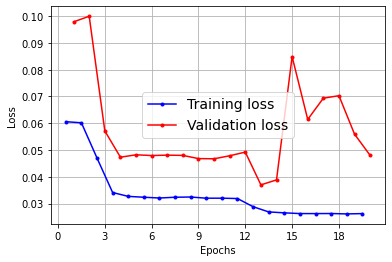

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [20]:
ypred_probs = model.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model.predict_classes(Xtest, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [39]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=([Xtrain.shape[1], Xtrain.shape[2]])))
model1.add(Dropout(0.2))
model1.add(Dense(units = 100))
model1.add(Dense(units = 100))
model1.add(Dense(units = 1))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [40]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 8, 256)            133120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 8, 100)            25700     
_________________________________________________________________
dense_18 (Dense)             (None, 8, 100)            10100     
_________________________________________________________________
dense_19 (Dense)             (None, 8, 1)              101       
Total params: 169,021
Trainable params: 169,021
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model1.fit(Xtrain, Ytrain, epochs=20,
                    validation_data=(Xval, Yval))

Epoch 1/20
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0602 - accuracy: 0.9352 - val_loss: 0.0989 - val_accuracy: 0.8904
Epoch 2/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0462 - accuracy: 0.9492 - val_loss: 0.0639 - val_accuracy: 0.9420
Epoch 3/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0222 - accuracy: 0.9751 - val_loss: 1.3322 - val_accuracy: 0.5873
Epoch 4/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0138 - accuracy: 0.9861 - val_loss: 2.0746 - val_accuracy: 0.8358
Epoch 5/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0076 - accuracy: 0.9936 - val_loss: 0.4828 - val_accuracy: 0.9599
Epoch 6/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0054 - accuracy: 0.9962 - val_loss: 0.3207 - val_accuracy: 0.9589
Epoch 7/20
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0046 - accuracy: 0.9974 - val_loss: 0.2099 - val_accuracy:

In [42]:
model1.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9890


[0.01928476057946682, 0.9890263676643372]

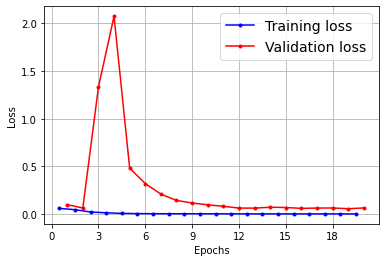

In [43]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [44]:
ypred_probs = model1.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model1.predict_classes(Xtest, verbose=0)

In [45]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [47]:
history = model1.fit(Xtrain, Ytrain, epochs=50,
                    validation_data=(Xval, Yval))

Epoch 1/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0021 - accuracy: 0.9979 - val_loss: 0.0627 - val_accuracy: 0.9658
Epoch 2/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0020 - accuracy: 0.9981 - val_loss: 0.0497 - val_accuracy: 0.9659
Epoch 3/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0020 - accuracy: 0.9981 - val_loss: 0.0525 - val_accuracy: 0.9658
Epoch 4/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0019 - accuracy: 0.9982 - val_loss: 0.0463 - val_accuracy: 0.9659
Epoch 5/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0019 - accuracy: 0.9983 - val_loss: 0.0446 - val_accuracy: 0.9655
Epoch 6/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0499 - val_accuracy: 0.9655
Epoch 7/50
1075/1075 [==============================] - 7s 7ms/step - loss: 0.0018 - accuracy: 0.9982 - val_loss: 0.0394 - val_accuracy:

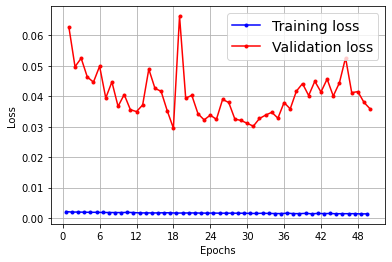

In [48]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [50]:
import tensorflow
tensorflow.keras.backend.clear_session()